## Erroneous and missing data

We need to collect or download data prior to any data science or machine learning project. In an ideal scenario, the data will be collected at a high quality without any errors. However, in reality, no dataset is clean. All datasets have to be checked for erroneous and missing data before using the dataset. It is always important to do so as any analysis with wrong or missing data will not be accurate!

Remember that you should import any required modules at the start of a notebook. You can do it in the cell below.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

## 1. Erroneous data

Erroneous data refer to data that is either collected wrongly or input wrongly in the dataset. For example, if we have a dataset containing number of rooms in a house, we expect all the values to be positive as it is not possible to have negative number of rooms. Thus, all negative values within the dataset will be erroneous.

While it may be easy in some cases to identify erroneous data, it may not be the case all the time. Using the same idea of the dataset containing number of rooms in a house, it may also be possible that large values may also be erroneous. However, it is now not so clear whether large numbers are errors or outliers. This is because very large houses such as mansions can have many rooms. As mansions are rare, their data points will show up as outliers. Outliers are not erroneous data! Outliers are just rare cases and are still valid data points.

The example below will show you the difference between erroneous data and outliers.

## 1.1 Pokemon Dataset

Let us take a look at the Pokemon dataset we had covered in the previous module. This dataset comes with 2 parts:
1. Pokemon Images
2. Pokemon CSV file with supporting data

These files are important and useful to the upcoming segments. We now need to check if the data contains any outliers or erroneous data. We will be using the matplotlib.image library to our advantage. Using the code segments provided below we can import and plot the images within the Jupyter notebook itself. 

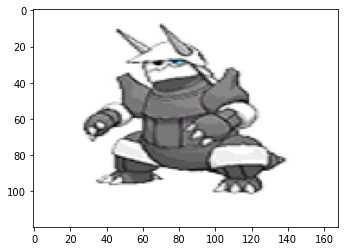

In [2]:
# Read image using imread function
img = mpimg.imread('PokeIMG/images/aggron.png')
plt.imshow(img)
plt.show()

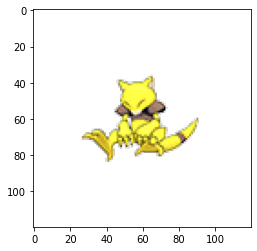

In [3]:
# Read image using imread function
img = mpimg.imread('PokeIMG/images/abra.png')
plt.imshow(img)
plt.show()

What do you notice about the figure above? 

As we can see, we are visualizing 2 images in the above code blocks, namely 'Aggron' and 'Abra'. These are 2 sample images within the dataset. Can you tell which one of these is erroneous and why?

Answer:
    
The Aggron image is erroneous because of the image size and how it has been scaled. In many image datasets there could be images that can be skewed and have odd sizes. This is something that we want to avoid to the best of our capacity. Let us consider a situation in which we are trying to train a model with these images and we are assuming that the images are all of the same size. How do we resolve this issue? We shall look into that in the upcoming code blocks. 

Let us now look at the sizes of the images that we have taken into consideration. 

### Task: Print out the sizes of the images 'Abra' and 'Aggron'

We now see that the image sizes are visible and not the same. We will be learning how to deal with these errors in the upcoming segments. But, before we get there take a look at another image in the dataset. 

### Task: Use matplotlib to plot the 'Garchomp' image and its size

In [6]:
img.shape

(120, 120)

What have you noticed from the above code segments? Have you noticed how the garchomp image is slightly different? The garchomp image is a grayscale image unlike the rest of the images. Now, let us consider a situation where we are training a machine learning model for Computer vision. During this process we take some assumptions and considerations into account. One of those assumptions could be that all images must be colored and not grayscale. 

Take a look at the code block below. Here we are trying to print out if the image is grayscale or not using the image shape. 

In [7]:
if len(img.shape) < 3:
    print('True') # Print True if the image is a grayscale
else:
    print('False')

True


## 1.2 Dealing with erroneous data

There can be multiple ways to deal with erroneous data in dataset and in this notebook we will be looking at multiple methods. There are 2 errors we are dealing with so far. 
1. Incorrectly sized images
2. Grayscale images

Let us first deal with the incorrectly sized images. We will be cropping the Aggron image and saving the new image using python so that we can still work with it. How you deal with erroneous data is entirely upto you and the model that you are using. It could also be advisible to delete the image itself. But for this example we will be cropping the image and saving it.

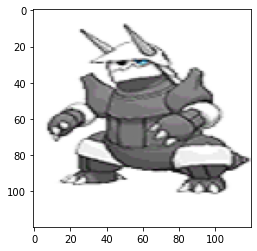

In [8]:
img = mpimg.imread('PokeIMG/images/aggron.png')
img = img[:,20:140,:]
plt.imshow(img)
plt.show()

In [9]:
plt.imsave('PokeIMG/images/aggron_1.png', img)

How can we deal with the grayscale image? And how do we know if there are more grayscale images? Let us write a for loop to loop through the names in the Pokemon dataset and try to find out how many grayscale images are there and how many images are missing. 

Reading the pokemon CSV file with all its contents.

In [20]:
dataframe = pd.read_csv("pokemon.csv")

In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 790
Data columns (total 3 columns):
Name     724 non-null object
Type1    724 non-null object
Type2    352 non-null object
dtypes: object(3)
memory usage: 22.6+ KB


In [12]:
dataframe.describe()

,Name,Type1,Type2
count,809,809,405
unique,809,18,18
top,genesect,Water,Flying
freq,1,114,95


The following code block tries to loop through the images in the dataframe's 'Name' column. After which it tries to import the image and print out an error is the image is not found. Once it had obtained the image, it checks if the image is grayscale or not. This way we are able to find out all the grayscale iamges in the dataset.

In [22]:
for i in dataframe['Name']:
    try:
        img = mpimg.imread('PokeIMG/images/' + i + '.png')
    except FileNotFoundError:
        print(i,' is missing!!')
        
        
    if len(img.shape) < 3:
        print(i, "is grayscale!!")


garchomp is grayscale!!
rowlet  is missing!!
rockruff  is missing!!
solgaleo  is missing!!


Congratulations. We have found that only **garchomp** is a grayscale image in the whole dataset. For this exaample let us delete the garchomp image from the dataset. In order to delete the image we need to delete 2 mentions of the image. 

The first mention of the image is in the image folder. **Go to the pokemon images folder and delete the garchomp.png file**. The next task is to delete the gamrchomp image mention from the pokemon.csv dataset. How do we do this?

### Task: Remove the row with a Name 'garchomp'

In [1]:
# go to images folder and delete garchomp image


#Remove the garchomp row from the dataset

Let us once again traverse through our dataset to check if the image is still present. 

In [21]:
for i in dataframe['Name']:
    try:
        img = mpimg.imread('PokeIMG/images/' + i + '.png')
    except FileNotFoundError:
        print(i,' is missing!!')
    if len(img.shape) < 3:
        print(i, "is grayscale!!")

garchomp is grayscale!!


## 2. Missing data

Missing data refer to gaps within the dataset. This is becasue not every data point can be collected. For example, if you are required to count the number of letters delivered by a postman each day, you may have no data on the days which the postman was on leave. Thus, you will fill in data on those days as missing data. Another possible reason for missing data could be due to carelessness of the person collecting the data. Sometimes, the person collecting the data may have forgotten to input the data into the dataset. Additionally, if you are obtaining data from survey forms, you can expect to encounter missing data due to incomplete forms. This is because not everyone will fill in all the fields within the survey form

Are you able to provide some possible reasons why there may be missing data in the scenarios listed below?
- Number of hours a teacher will spend in school a day
- Number of phone calls an office worker receives on the mobile phone in a day
- Air temperature of your city

In [17]:
- Teacher may not remember the number of hours spent in school 
- Call history may be deleted before data was recorded
- Temperature sensors may not have collected data during maintenance

SyntaxError: invalid syntax (<ipython-input-17-9b64ecd0d1cf>, line 1)

Missing data can have many different forms. Usually, we will refer to missing data as NaN but some datasets will use either very large numbers or very small numbers to represent missing data. One example will be that of meteorological or weather data. The value of -9999 is used to represent missing data values in these datasets.

It is important to remove or replace these missing data values in a dataset before conducting any analysis. This is to ensure accuracy in our analysis.

In the example below, you will learn how to identify and treat these missing values.

Let us once again consider the example of the pokemon dataset. Run the below code block to detect which images are mentioned in the CSV file but are note present in the images folder. 

In [18]:
for i in dataframe['Name']:
    try:
        img = mpimg.imread('PokeIMG/images/' + i + '.png')
    except FileNotFoundError:
        print(i,' is missing')
        
        
    if len(img.shape) < 3:
        print(i, "is grayscale!!")

rowlet  is missing
rockruff  is missing
solgaleo  is missing


We can notice here that Rowlet, Rockruff and Solgaleo are 3 pokemon whos names are in the dataset but images are not. Let us once again remove the images from the dataset.

### Task: Remove the rows with the missing names

Now let us save the dataframe to pokemon.csv once again. 

In [ ]:
dataframe.to_csv('pokemon.csv', index = False)